<a href="https://colab.research.google.com/github/Previaaulia/ANN-prediction/blob/main/TA_PKK_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praproses Data

In [ ]:
# Data Processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#pemodelan data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping


In [ ]:
# Menghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive')

# Path Dataset
path = "/content/drive/MyDrive/Tugas/heart_failure_clinical_records_dataset.csv"
dataset = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#mengecek summary tiap atribut
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#Mengecek nilai missing values tiap atribut
dataset.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

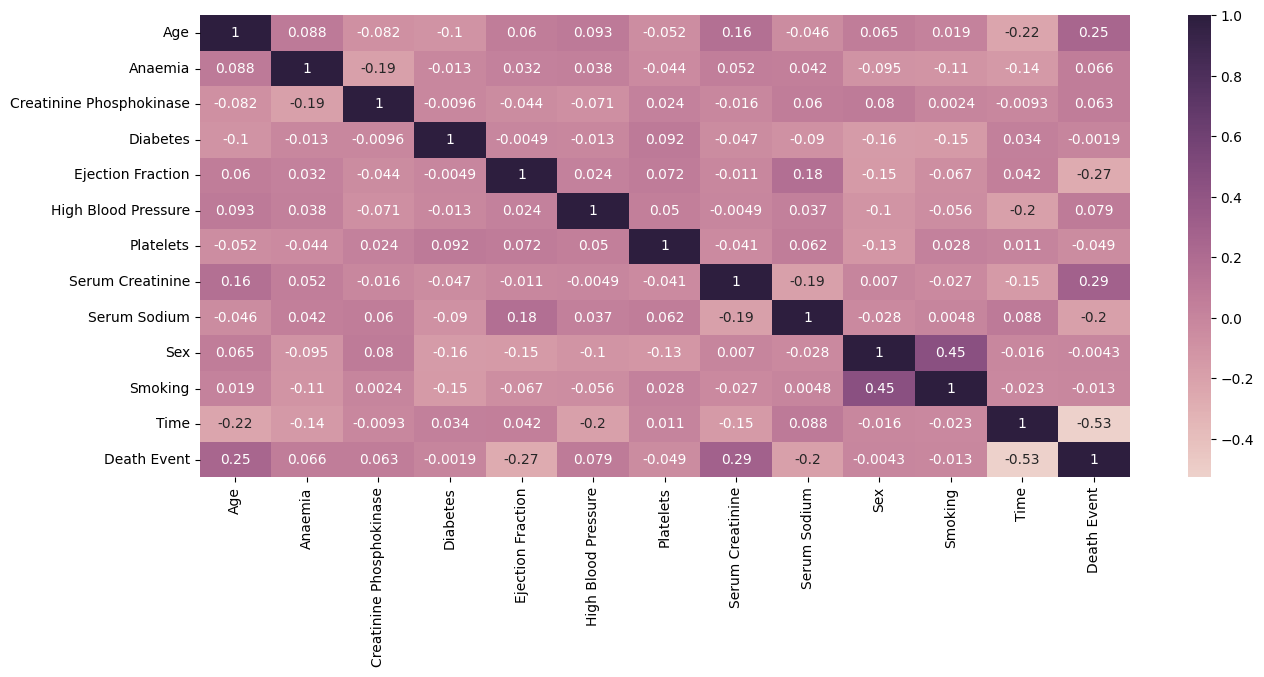

In [ ]:
# Korelasi antar dataset
h_labels = [x.replace('_', ' ').title()

for x in list(dataset.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(15,6))
_ = sns.heatmap(
dataset.corr(),
annot=True,
xticklabels=h_labels,
yticklabels=h_labels,
cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [ ]:
#Konversi INT64 menjadi float
dataset[['anaemia', 'diabetes', 'creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure']] = dataset[['anaemia', 'diabetes', 'creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure']].astype(float)
dataset[['sex', 'serum_sodium', 'smoking', 'time', 'DEATH_EVENT']] = dataset[['sex', 'serum_sodium', 'smoking', 'time', 'DEATH_EVENT']].astype(float)


In [ ]:
# Membagi variabel yang digunakan sebagai prediksi (X) dan hasil prediksi seharusnya (Y)
X = dataset.drop(["DEATH_EVENT"], axis=1)
y = dataset["DEATH_EVENT"]


In [ ]:
# Normmalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Modelling Data

In [ ]:
# Membagi menjadi data test dan data train secara random
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=7)


In [ ]:
early_stopping = EarlyStopping(
    min_delta=0.0001, # minimum amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True
)

# Membuat model ANN
model = Sequential()
# Layer
model.add(Dense(units=8, kernel_initializer='glorot_uniform', activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.25)) #membantu biar ga overfitting
model.add(Dense(units=6, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
# Compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#!pip install ann-visualizer

In [ ]:
#Visualisasi ANN
from ann_visualizer.visualize import ann_viz
import graphviz

ann_viz(model, filename="Prediksi model.png", title="Prediksi Kematian Akibat Gagal Jantung Dengan Algoritma ANN")

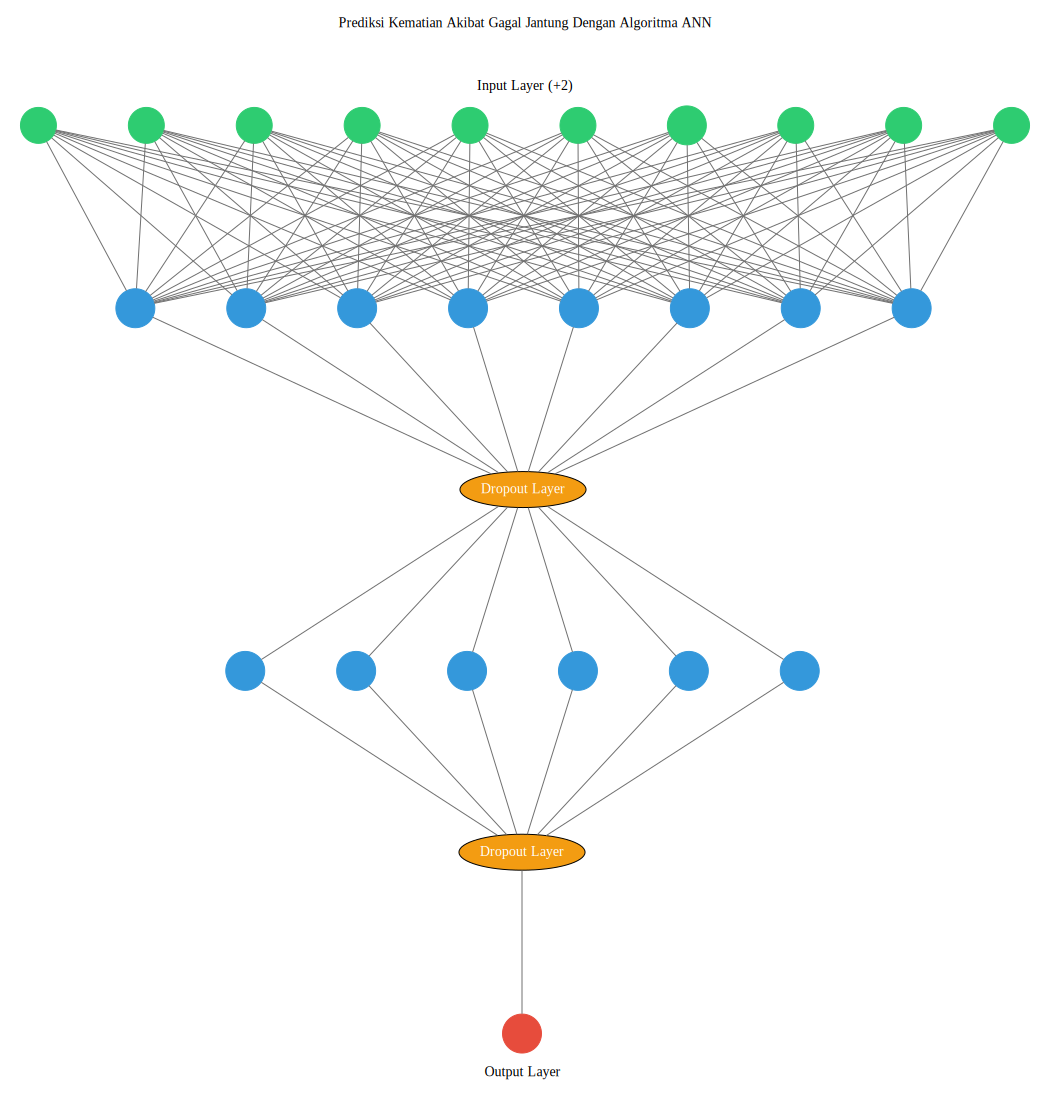

In [ ]:
graph_file = graphviz.Source.from_file('Prediksi model.png')
graph_file

## Training

In [ ]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size=32, epochs=150, callbacks=[early_stopping], validation_split=0.2)


Epoch 1/150
6/6 [==============================] - 1s 28ms/step - loss: 1.0153 - accuracy: 0.4525 - val_loss: 0.7891 - val_accuracy: 0.3333
Epoch 2/150
6/6 [==============================] - 0s 10ms/step - loss: 0.8520 - accuracy: 0.4693 - val_loss: 0.7743 - val_accuracy: 0.4444
Epoch 3/150
6/6 [==============================] - 0s 6ms/step - loss: 0.8820 - accuracy: 0.4916 - val_loss: 0.7623 - val_accuracy: 0.4444
Epoch 4/150
6/6 [==============================] - 0s 6ms/step - loss: 0.8822 - accuracy: 0.4637 - val_loss: 0.7509 - val_accuracy: 0.4667
Epoch 5/150
6/6 [==============================] - 0s 6ms/step - loss: 0.9402 - accuracy: 0.4358 - val_loss: 0.7406 - val_accuracy: 0.5111
Epoch 6/150
6/6 [==============================] - 0s 6ms/step - loss: 0.7999 - accuracy: 0.4804 - val_loss: 0.7310 - val_accuracy: 0.5111
Epoch 7/150
6/6 [==============================] - 0s 6ms/step - loss: 0.7646 - accuracy: 0.5587 - val_loss: 0.7231 - val_accuracy: 0.5556
Epoch 8/150
6/6 [========

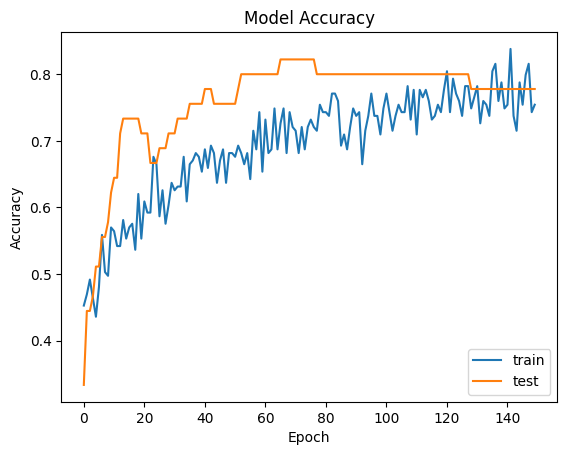

In [ ]:
# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'],loc='lower right')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

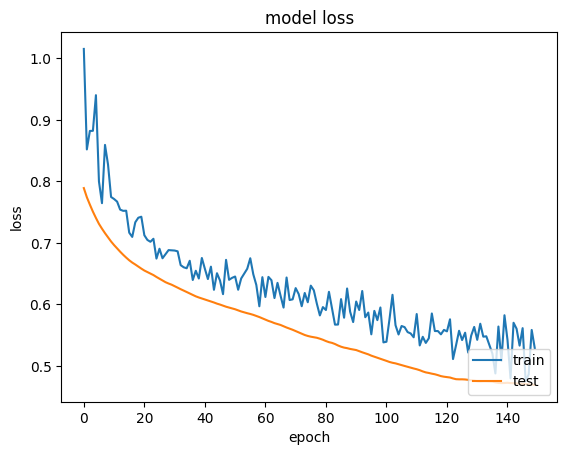

In [ ]:
# Summarize History for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## Testing

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Menghitung Akurasi
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

print(score)

3/3 [==============================] - 0s 4ms/step
0.8933333333333333


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        57
         1.0       0.86      0.67      0.75        18

    accuracy                           0.89        75
   macro avg       0.88      0.82      0.84        75
weighted avg       0.89      0.89      0.89        75

